In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load data
# species_info.csv - contains data about different species and their conservation status

species_df = pd.read_csv('species_info.csv')
obs_df = pd.read_csv('observations.csv')

species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [100]:
obs_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [101]:
species_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [102]:
species_df.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [103]:
species_df['conservation_status'] = species_df['conservation_status'].fillna('No Intervention')
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [104]:
obs_df.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [105]:
protection_counts = species_df.groupby('conservation_status').scientific_name.nunique().reset_index()
protection_counts = protection_counts.sort_values(by='scientific_name')
protection_counts

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No Intervention,5363


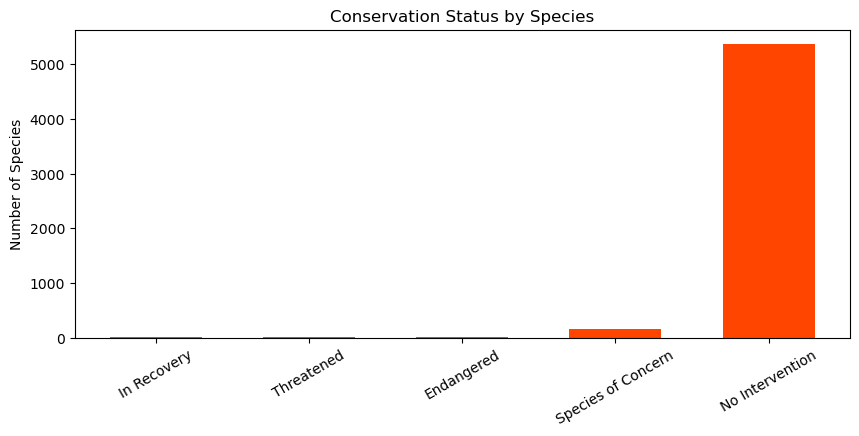

In [106]:
plt.figure(figsize=(10, 4))
plt.bar(x=protection_counts.conservation_status,height=protection_counts.scientific_name,width = 0.6,align='center', color = 'orangered')
plt.tick_params(axis='x',direction='out',labelrotation=30)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

In [107]:
# Are certain types of animals likely to be endangered

# add new column for endangered
species_df['is_protected'] = (species_df.conservation_status != 'No Intervention')

cons_df = species_df.groupby(['category', 'is_protected'])\
                         .scientific_name.nunique().reset_index()
cons_df.head()

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


In [113]:
cons_pivot = cons_df.pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name').reset_index()
cons_pivot


is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [112]:
#cons_pivot['perc_prot'] = cons_pivot.True/(cons_pivot.False+cons_pivot.True)
cons_pivot['perc_prot'] = cons_pivot[True] / (cons_pivot[True] + cons_pivot[False])
cons_pivot

is_protected,category,False,True,perc_prot
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


In [110]:
from scipy.stats import chi2_contingency

# Are any categories more at risk than others?

# Hypothesis: Mammals are more likely to be endangered than fish
# Null hypothesis - the variables mammals and fish are independent
contingency = [[30, 146],
              [11, 115]]

chi2_contingency(contingency)


Chi2ContingencyResult(statistic=np.float64(3.647651024981415), pvalue=np.float64(0.0561483484489001), dof=1, expected_freq=array([[ 23.89403974, 152.10596026],
       [ 17.10596026, 108.89403974]]))

# p-value is > 0.05 so not enough evidence to reject the null hypothesis. This implies the variables are not related and mammals aren't likely to be more endangered than fish

In [115]:
# Null hypothesis - the variables mammals and reptiles are independent
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=np.float64(4.289183096203645), pvalue=np.float64(0.03835559022969898), dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

# p-value is < 0.05 so enough evidence to reject the null hypothesis. This implies the variables are dependent and mammals are more likely to be endangered than fish